Método de la transformada inversa: distribución de Poisson

Simule la ocurrencia de eventos en un proceso de Poisson de tasa λ = 5/h, hasta un tiempo T=3 h. Para ello
recuerde que los tiempos entre eventos siguen una distribución exponencial. Utilice el método de la función
inversa para generar los valores de los saltos.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import random

In [7]:
u=random.random()
x=-math.log(u)
x

1.0254159701743182

0.09136827173188616 1
0.18273654346377233 2
0.2741048151956585 3
0.36547308692754465 4
0.4568413586594308 5
0.548209630391317 6
0.6395779021232031 7
0.7309461738550893 8
0.8223144455869755 9
0.9136827173188617 10
1.005050989050748 11
1.0964192607826342 12
1.1877875325145204 13
1.2791558042464066 14
1.3705240759782928 15
1.461892347710179 16
1.5532606194420653 17
1.6446288911739515 18
1.7359971629058377 19
1.827365434637724 20
1.9187337063696102 21
2.0101019781014964 22
2.1014702498333824 23
2.1928385215652684 24
2.2842067932971544 25
2.3755750650290404 26
2.4669433367609264 27
2.5583116084928124 28
2.6496798802246984 29
2.7410481519565844 30
2.8324164236884704 31
2.9237846954203563 32
3.0151529671522423 33


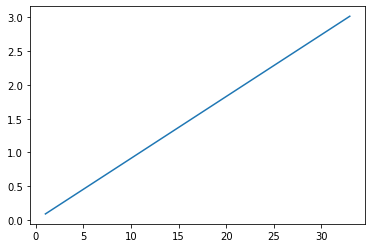

In [15]:
t,i=0,0
eventos=[]
numero=[]
u=random.random()
while t<3:
    t=t-(1/5)*math.log(u)
    i=i+1
    eventos.append(t)
    numero.append(i)
    print(t,i)
plt.plot(numero,eventos)